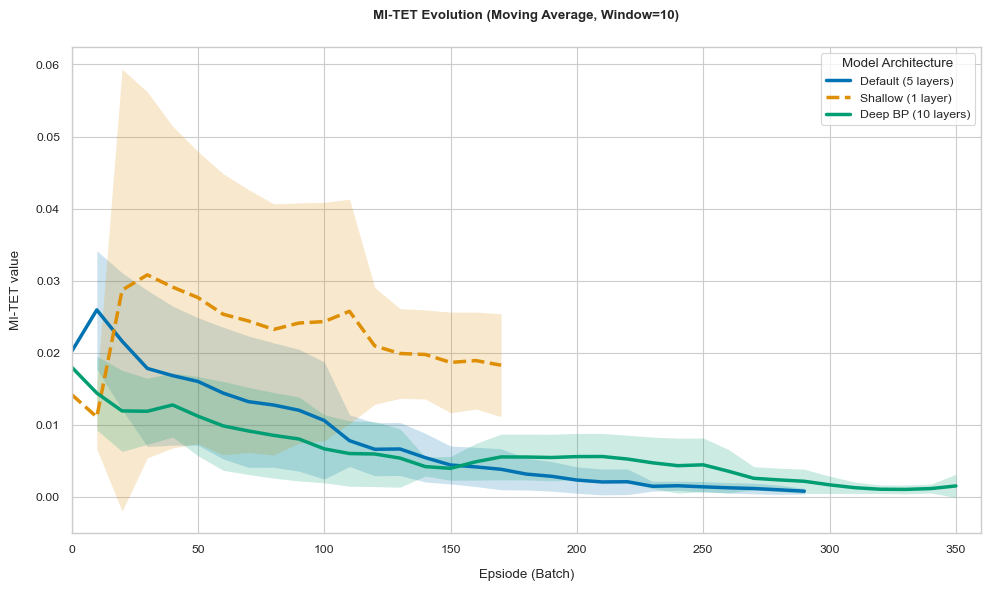

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_default = pd.read_csv('results_default.csv')
df_shallow = pd.read_csv('results_shallow.csv')
df_deep = pd.read_csv('results_deep_BP.csv')

def process_data(df, col_name='mi-tet', window=10) :
    series = df[col_name].dropna().reset_index(drop=True)
    rolling_mean = series.rolling(window=window, min_periods=1).mean()
    rolling_std = series.rolling(window=window, min_periods=1).std()
    return rolling_mean, rolling_std

WINDOW_SIZE = 10
BATCH_INTERVAL = 10

mean_default, std_default = process_data(df_default, window=WINDOW_SIZE)
mean_shallow, std_shallow = process_data(df_shallow, window=WINDOW_SIZE)
mean_deep, std_deep = process_data(df_deep, window=WINDOW_SIZE)

sns.set_theme(style='whitegrid', context='paper')

plt.figure(figsize=(10, 6))
palette = sns.color_palette('colorblind')

def plot_with_error_band(x_index, mean, std, label, color, linestyle='-') :
    x = x_index * BATCH_INTERVAL
    sns.lineplot(x=x, y=mean, label=label, color=color, linewidth=2.5, linestyle=linestyle)
    plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.2, linewidth=0)

plot_with_error_band(mean_default.index, mean_default, std_default, 'Default (5 layers)', palette[0])
plot_with_error_band(mean_shallow.index, mean_shallow, std_shallow, 'Shallow (1 layer)', palette[1], linestyle='--')
plot_with_error_band(mean_deep.index, mean_deep, std_deep, 'Deep BP (10 layers)', palette[2])

plt.title(f'MI-TET Evolution (Moving Average, Window={WINDOW_SIZE})', pad=20, fontweight='bold')
plt.xlabel('Epsiode (Batch)', labelpad=10)
plt.ylabel('MI-TET value', labelpad=10)

max_len = max(len(mean_default), len(mean_shallow), len(mean_deep))
plt.xlim(0, max_len * BATCH_INTERVAL)

plt.legend(title='Model Architecture', loc='upper right', frameon=True)

plt.tight_layout()
#plt.savefig('mi_tet_comparison_band.png', dpi=300, bbox_inches='tight')
plt.show()